Gradient Descent with Two Features


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sy
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression

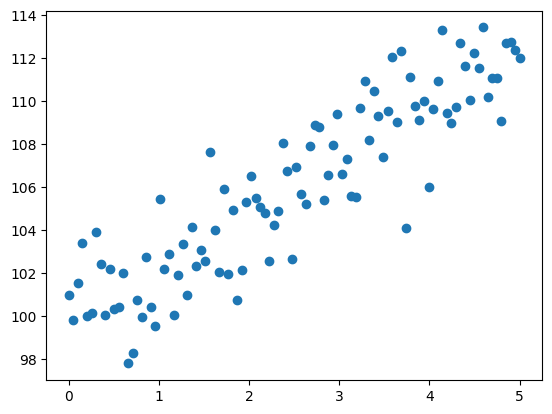

In [7]:
np.random.seed(42)
x = np.linspace(0, 5, 100)
y = 100 + 2.5*x + np.random.normal(size = 100, scale = 2)
plt.scatter(x, y)

#### Adding a Bias Term


In [8]:

X = np.concatenate((np.ones((len(x), 1)), x.reshape(-1, 1)), axis = 1)
X = pd.DataFrame(X, columns = ['bias', 'x'])

X.head()

,bias,x
0,1.0,0.000000
1,1.0,0.050505
2,1.0,0.101010
3,1.0,0.151515
4,1.0,0.202020


#### Gradient of MSE


In [9]:

def mse_grad(theta, x, y):
    x0 = x.iloc[:, 0]
    x1 = x.iloc[:, 1]
    dt0 = np.mean( 2 * (y - theta[0] * x0 - theta[1] * x1)*(-x0))
    dt1 = np.mean(2 * (y - theta[0] * x0 - theta[1] * x1)*(-x1))
    
    return np.array([dt0, dt1])

mse_grad(np.array([0, 0]), X, y)

array([-212.08461393, -541.07317119])

#### Gradient Descent


In [10]:

thetas = []
theta = np.array([0, 0])
lr = 0.01
for i in range(1000):
    thetas.append(theta)


    theta = theta - (lr * mse_grad(theta, X, y))

thetas[-3:]

[array([98.78713519,  2.82142747]),
 array([98.79116725,  2.82018957]),
 array([98.79518057,  2.81895743])]


#### DataFrame of updates


In [11]:
thetas_df = ''
thetas_df = pd.DataFrame(thetas, columns = ['intercept', 'slope'])

thetas_df.tail(1)

,intercept,slope
999,98.795181,2.818957


#### Comparing with `sklearn`

Below, a regression model from sklearn is fit and the coefficients are shown.  These should be very close to what your gradient descent routine found.  To get closer feel free to experiment with the learning rate and number of iterations.  Beware that too many iterations and too small a learning rate will be very slow to train!

In [12]:
lr = LinearRegression(fit_intercept=False).fit(X, y)
lr.coef_

array([99.65437429,  2.55517307])